Markov Networks

Markov Networks are models in which the connection between events are defined by a graphical structure. They are undirected models used in problem areas where directionality among interacting random variables cannot be defined.
Factors are parameters of markov networks. There is no directionality and they are not probabilistic in nature, hence values don't add up to 1. They can take any positive values.  

Conditional Random Fields 

Conditional Random Fields is a type of Markov Network (special case of Markov Random Network) used for prediction tasks where contextual information or state of the neighbors affect the current prediction. 

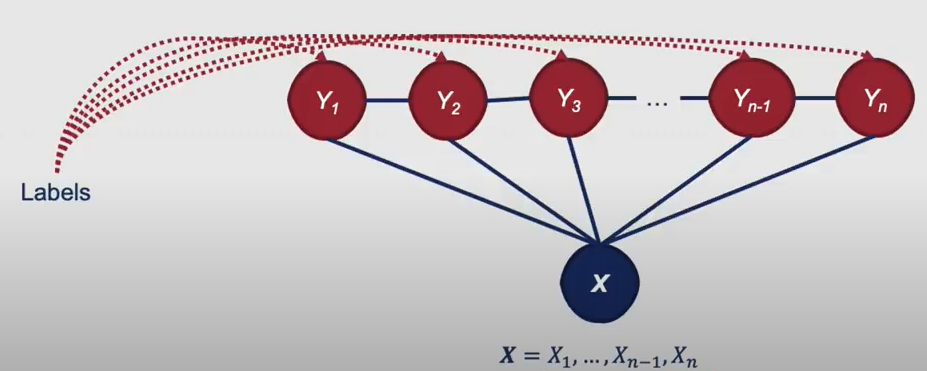

CRF is a discriminative model representing set of observed random variables X and a set of unobserved random variables Y. what are the assignment to the Y variables that most likely generated the observations X.

CRF are very useful when we want to do classification by taking into account neighboring samples.

Example - classify cat as happy or sad 


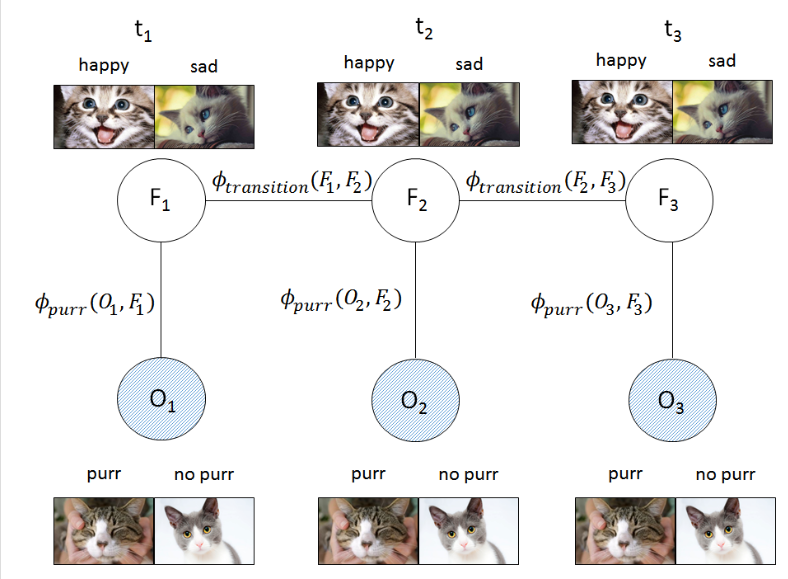






In [2]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 68.5 MB/s eta 0:00:00


In [3]:
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np

In [ ]:
pip install pgmpy

In [4]:
phi = DiscreteFactor(['A', 'B'], [3, 2], [10,1000, 1, 5, 100,23])
print(phi)

+------+------+------------+
| A    | B    |   phi(A,B) |
+======+======+============+
| A(0) | B(0) |    10.0000 |
+------+------+------------+
| A(0) | B(1) |  1000.0000 |
+------+------+------------+
| A(1) | B(0) |     1.0000 |
+------+------+------------+
| A(1) | B(1) |     5.0000 |
+------+------+------------+
| A(2) | B(0) |   100.0000 |
+------+------+------------+
| A(2) | B(1) |    23.0000 |
+------+------+------------+


In [5]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np 
from pgmpy.inference import BeliefPropagation

In [6]:
def toVal(string):
    if string=='purr': 
        return 0; 
    else:
        return 1; 
     
catState=['happy','sad']
MM=MarkovNetwork();

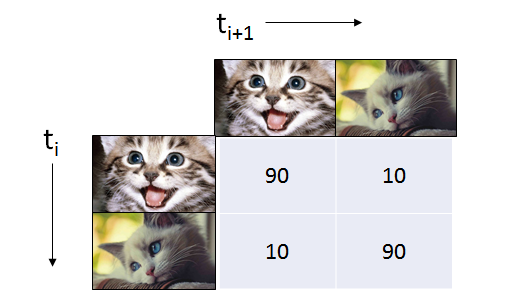

In [23]:

MM.add_edges_from([('f1', 'f2'), ('f2', 'f3'),('o1','f1'),('o2','f2'),('o3','f3')])
 
#NO DEPENDENCY
#transition=np.array([10, 10, 10, 10]); 
#RELAXED CAT
transition=np.array([90,10,10,90]); 
#DIVA CAT
#transition=np.array([10, 90, 90, 10]); 
 
 
purr_happy=80; 
purr_sad=20
noPurr_happy=15; 
noPurr_sad=25; 
 
factorObs1= DiscreteFactor(['o1','f1'],cardinality=[2, 2], \
values=np.array([purr_happy, purr_sad, noPurr_happy,noPurr_sad]))
factorObs2= DiscreteFactor(['o2','f2'],cardinality=[2, 2], \
values=np.array([purr_happy, purr_sad, noPurr_happy,noPurr_sad]))
factorObs3= DiscreteFactor(['o3','f3'],cardinality=[2, 2], \
values=np.array([purr_happy, purr_sad, noPurr_happy, noPurr_sad]))
 
factorH1= DiscreteFactor(['f1','f2'],cardinality=[2, 2], values=transition)
factorH2= DiscreteFactor(['f2','f3'],cardinality=[2, 2], values=transition)
 
 
#factor.values
MM.add_factors(factorH1)
MM.add_factors(factorH2)
MM.add_factors(factorObs1)
MM.add_factors(factorObs2)
MM.add_factors(factorObs3)

In [24]:
belief_propagation = BeliefPropagation(MM)
ymax=belief_propagation.map_query(variables=['f1','f2','f3'],\
evidence={'o1' : toVal('purr'), 'o2' : toVal('no_purr'), 'o3' : toVal('purr')})
#ymax=belief_propagation.map_query(variables=['f1','f2','f3'],\
#evidence={'o1' : toVal('purr'), 'o2' : toVal('no_purr'), 'o3' : toVal('no_purr')})
#ymax=belief_propagation.map_query(variables=['f1','f2','f3'], \
#evidence={'o1' : toVal('purr'), 'o2' : toVal('purr'), 'o3' : toVal('purr')})
 
print('f1: ' + str(ymax['f1']) + ' = ' + catState[ymax['f1']]);
print('f2: ' + str(ymax['f2']) + ' = ' + catState[ymax['f2']]);
print('f3: ' + str(ymax['f3']) + ' = ' + catState[ymax['f3']]);

f1: 0 = happy
f2: 1 = sad
f3: 0 = happy
